In [161]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [162]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [163]:
model = torch.load('2nd-model')

In [164]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [165]:
def predict(image_path, model, classes):
    # Load and preprocess the image
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image)

    # Add batch dimension
    image = image.unsqueeze(0)

    # Move the image to the device (CPU or GPU)
    image = image.to(device)

    # Make a prediction
    with torch.no_grad():
        output = model(image)

    # Get the predicted class
    _, predicted = torch.max(output.data, 1)

    # Map the predicted class to the corresponding label
    predicted_class = classes[predicted.item()]

    plt.imshow(image.cpu().squeeze().permute(1, 2, 0))
    plt.title(f'Predicted class: {predicted_class}')
    plt.show()

    return predicted_class

In [166]:
image_path = "drawing.jpg"

In [167]:
classes = ['drawing', 'hentai', 'neutral', 'porn', 'sexy']  # Replace with your actual class labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


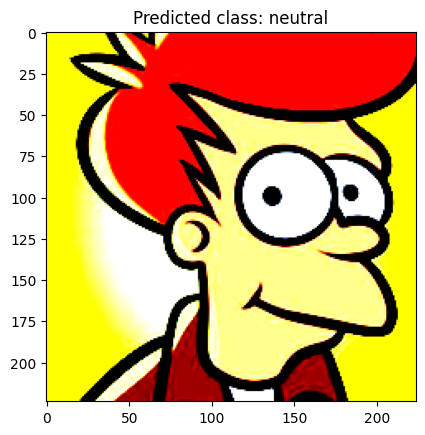

'neutral'

In [168]:
predict(image_path, model, classes)